<a href="https://colab.research.google.com/github/Nishant0851/HH/blob/master/Project_House_Loan_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Importing data
df = pd.read_csv("loan_data (1).csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# shape
df.shape

(36912, 122)

In [8]:
# Info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36912 entries, 0 to 36911
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(103), int64(3), object(16)
memory usage: 34.4+ MB


In [9]:
# Describe
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,36912.000000,36912.000000,36912.000000,3.691200e+04,3.691200e+04,36912.000000,3.688300e+04,36911.000000,36911.000000,36911.000000,...,36911.000000,36911.000000,36911.000000,36911.000000,31927.000000,31927.000000,31927.000000,31927.000000,31927.000000,31927.000000
mean,121457.466596,0.080678,0.416694,1.712981e+05,5.990152e+05,27107.772269,5.383552e+05,0.020777,-16036.986969,64261.983311,...,0.008453,0.000677,0.000542,0.000406,0.007392,0.007862,0.033357,0.270179,0.261534,1.890845
std,12346.823830,0.272344,0.723625,6.160395e+05,4.015488e+05,14606.645101,3.689692e+05,0.013764,4361.836574,141668.034459,...,0.091551,0.026017,0.023272,0.020155,0.090288,0.113189,0.197988,0.932869,0.607080,1.866820
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000533,-25182.000000,-17531.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110731.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,0.010006,-19675.000000,-2781.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,121527.500000,0.000000,0.000000,1.440000e+05,5.147775e+05,24939.000000,4.500000e+05,0.018850,-15757.000000,-1219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,132183.250000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12386.000000,-282.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,142754.000000,1.000000,11.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7680.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,6.000000,6.000000,24.000000,8.000000,25.000000


In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
# Step02 : Check for null values in the dataset

In [12]:
df.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     4985
AMT_REQ_CREDIT_BUREAU_WEEK    4985
AMT_REQ_CREDIT_BUREAU_MON     4985
AMT_REQ_CREDIT_BUREAU_QRT     4985
AMT_REQ_CREDIT_BUREAU_YEAR    4985
Length: 122, dtype: int64

In [13]:
# Step03 : Print percentage of default to payer of the dataset for the TARGET column

In [14]:
defaulters=(df.TARGET==1).sum()
payers=(df.TARGET==0).sum()
default_payer = defaulters/payers*100
print("percentage of default to payer is :", default_payer)

percentage of default to payer is : 8.775859020451465


In [15]:
t1 = df["TARGET"].value_counts()

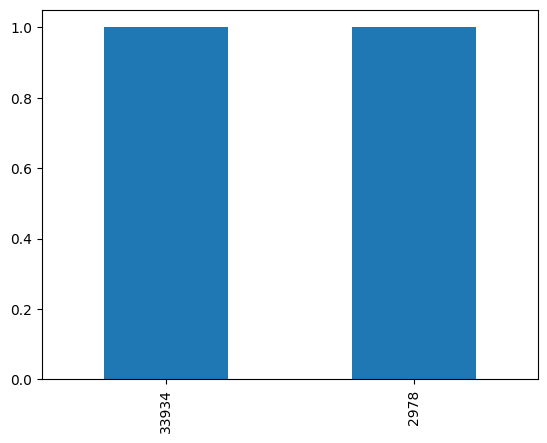

In [16]:
t1.value_counts().plot(kind = "bar")
plt.show()

In [17]:
# Balance the dataset using under-fitting random sampling
shuffled_df = df.sample(frac=1,random_state=25)
fraud_df = shuffled_df[shuffled_df["TARGET"]==1]
nonfraud_df = shuffled_df[shuffled_df["TARGET"]==0].sample(n=24825,random_state=25)
balanced_df = pd.concat([fraud_df,nonfraud_df])

In [18]:
shuffled_df.shape

(36912, 122)

In [19]:
shuffled_df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
6072,107102,0,Cash loans,F,N,Y,0,36000.0,910890.0,26761.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
29594,134363,0,Cash loans,F,Y,Y,0,67500.0,697500.0,25848.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
fraud_df.shape

(2978, 122)

In [21]:
fraud_df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
10028,111668,1,Cash loans,F,Y,Y,0,135000.0,787131.0,42066.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23544,127394,1,Cash loans,M,N,Y,2,54000.0,101880.0,10827.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
nonfraud_df.shape

(24825, 122)

In [23]:
nonfraud_df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
7402,108629,0,Cash loans,F,N,N,0,135000.0,161730.0,8257.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0
8868,110311,0,Cash loans,F,N,Y,2,225000.0,189000.0,12915.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [24]:
# Plot the balanced data or imbalanced data

In [25]:
t2 = balanced_df["TARGET"].value_counts()
t2

0    24825
1     2978
Name: TARGET, dtype: int64

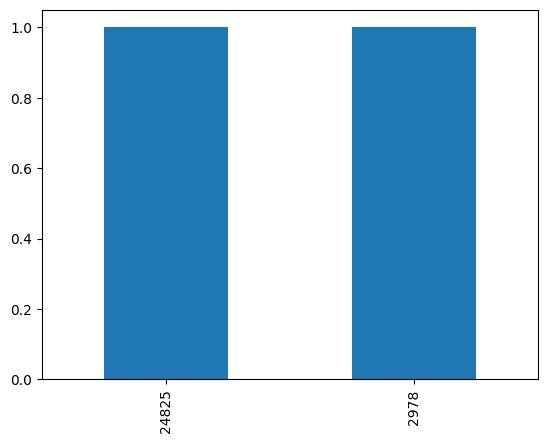

In [26]:
t2.value_counts().plot(kind = "bar")
plt.show()

In [27]:
balanced_df["TARGET"].value_counts()

0    24825
1     2978
Name: TARGET, dtype: int64

In [28]:
balanced_df.drop(columns=(["WEEKDAY_APPR_PROCESS_START","FLAG_OWN_REALTY","NAME_TYPE_SUITE","FONDKAPREMONT_MODE","EMERGENCYSTATE_MODE"]),inplace=True)
balanced_df.describe(include="object")

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE
count,27803,27803,27803,27802,27802,27802,27802,19189,27802,13801,13602
unique,2,3,2,5,5,5,6,18,58,3,7
top,Cash loans,F,N,Working,Secondary / secondary special,Married,House / apartment,Laborers,Business Entity Type 3,block of flats,Panel
freq,25177,18140,18344,14563,19770,17842,24681,4959,6097,13538,5907


In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
#  Encode the columns
le=LabelEncoder()
balanced_df["NAME_CONTRACT_TYPE"]=le.fit_transform(balanced_df["NAME_CONTRACT_TYPE"])
balanced_df["CODE_GENDER"]=le.fit_transform(balanced_df["CODE_GENDER"])
balanced_df["FLAG_OWN_CAR"]=le.fit_transform(balanced_df["FLAG_OWN_CAR"])
balanced_df["NAME_INCOME_TYPE"]=le.fit_transform(balanced_df["NAME_INCOME_TYPE"])
balanced_df["NAME_EDUCATION_TYPE"]=le.fit_transform(balanced_df["NAME_EDUCATION_TYPE"])
balanced_df["NAME_FAMILY_STATUS"]=le.fit_transform(balanced_df["NAME_FAMILY_STATUS"])
balanced_df["NAME_HOUSING_TYPE"]=le.fit_transform(balanced_df["NAME_HOUSING_TYPE"])
balanced_df["OCCUPATION_TYPE"]=le.fit_transform(balanced_df["OCCUPATION_TYPE"])
balanced_df["ORGANIZATION_TYPE"]=le.fit_transform(balanced_df["ORGANIZATION_TYPE"])
balanced_df["HOUSETYPE_MODE"]=le.fit_transform(balanced_df["HOUSETYPE_MODE"])
balanced_df["NAME_CONTRACT_TYPE"]=le.fit_transform(balanced_df["NAME_CONTRACT_TYPE"])
balanced_df["WALLSMATERIAL_MODE"]=le.fit_transform(balanced_df["WALLSMATERIAL_MODE"])

In [31]:
balanced_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
10028,111668,1,0,0,1,0,135000.0,787131.0,42066.0,679500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23544,127394,1,0,1,0,2,54000.0,101880.0,10827.0,90000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32850,138070,1,0,0,0,0,56250.0,1288350.0,37795.5,1125000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25341,129473,1,0,1,0,0,180000.0,286704.0,22648.5,247500.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
33703,139045,1,0,0,0,0,112500.0,778968.0,22455.0,558000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [32]:
x=balanced_df.drop(["TARGET"],axis=1)
y=balanced_df[["TARGET"]]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=25)

In [35]:
x_train.shape,x_test.shape

((20852, 116), (6951, 116))

In [36]:
y_train.shape,y_test.shape

((20852, 1), (6951, 1))

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [39]:
import tensorflow as tf

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [41]:
model=Sequential()
model.add(Dense(256,activation="relu",input_shape=(x_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1,activation="sigmoid"))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               29952     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6

In [43]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [44]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
652/652 [==============================] - 5s 5ms/step - loss: nan - accuracy: 0.8923 - val_loss: nan - val_accuracy: 0.8943
Epoch 2/100
652/652 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.8924 - val_loss: nan - val_accuracy: 0.8943
Epoch 3/100
652/652 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.8924 - val_loss: nan - val_accuracy: 0.8943
Epoch 4/100
652/652 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.8924 - val_loss: nan - val_accuracy: 0.8943
Epoch 5/100
652/652 [==============================] - 3s 5ms/step - loss: nan - accuracy: 0.8924 - val_loss: nan - val_accuracy: 0.8943
Epoch 6/100
652/652 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.8924 - val_loss: nan - val_accuracy: 0.8943
Epoch 7/100
652/652 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.8924 - val_loss: nan - val_accuracy: 0.8943
Epoch 8/100
652/652 [====================

In [45]:
pred=(model.predict(x_test)>0.5)*1.0
pred

218/218 [==============================] - 0s 2ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [46]:
from sklearn.metrics import confusion_matrix,classification_report

In [47]:
print(confusion_matrix(pred,y_test))

[[6216  735]
 [   0    0]]
